In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.utils import shuffle
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import sys
import seaborn as sb
from minisom import MiniSom
from sklearn.preprocessing import LabelEncoder


In here we analysis <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"> Wine Quality Data Set</a> 

In [2]:
# read data from csv files with pandas lib
red_wine = pd.read_csv("data/winequality-red.csv", delimiter=";")
white_wine = pd.read_csv("data/winequality-white.csv", delimiter=";")

In [3]:
# show head winequality-red data
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**'winequality-red' data features** are  'fixed acidity',  'volatile acidity',  'citric acid',  'residual sugar',  'chlorides',
 'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates',  'alcohol',  'quality'

In [4]:
# show head winequality-white data
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**'winequality-white' data features** are  'fixed acidity',  'volatile acidity',  'citric acid',  'residual sugar',  'chlorides',
 'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates',  'alcohol',  'quality'

* **As we see both datasets have the same features with different values**

In [5]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 * As we see all data numeric types and specifically quality in int type and total samples is 1599 and not include any nan values

In [6]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* As we see all data numeric types and specifically quality in int type  and total samples is 4898  and not include any nan values

In [7]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


***Let's explain above table:***

    - count -> show total count of feature samples (eg, count of records for fixed acidity is 1599 and also the other feature are the same number)
    - mean  -> mean of feature samples(eg, mean of fixed acidity is 8.319637)
    - std   -> std of feature samples(eg, std of fixed acidity is 1.741096)
    - min   -> minimum value of feature samples(eg, minimum value of fixed acidity is 4.6)
    - max   -> maximum value of feature samples(eg, maximum value of fixed acidity is 15.9)
    - 25%   -> first quartile that is %25 percent of feature sample values smaller than this value(eg, %25 percentile of fixed acidity is 7.1)
    - 50%   -> second quartile that is %50 percent of feature sample values smaller than this value(eg, %50 percentile of fixed acidity is 7.9)
    - 75%   -> third quartile that is %75 percent of feature sample values smaller than this value(eg, %75 percentile of fixed acidity is 9.2)

In [8]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


***Let's explain above table:***

    - count -> show total count of feature samples (eg, count of records for fixed acidity is 4898 and also the other feature are the same number)
    - mean  -> mean of feature samples(eg, mean of fixed acidity is 6.854788)
    - std   -> std of feature samples(eg, std of fixed acidity is 0.843868)
    - min   -> minimum value of feature samples(eg, minimum value of fixed acidity is 3.8)
    - max   -> maximum value of feature samples(eg, maximum value of fixed acidity is 14.2)
    - 25%   -> first quartile that is %25 percent of feature sample values smaller than this value(eg, %25 percentile of fixed acidity is 6.3)
    - 50%   -> second quartile that is %50 percent of feature sample values smaller than this value(eg, %50 percentile of fixed acidity is 6.8)
    - 75%   -> third quartile that is %75 percent of feature sample values smaller than this value(eg, %75 percentile of fixed acidity is 7.3)

# 1. BOXPLOTs

<img src="images/box_plot_.JPG" />
<a href = "https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51">source</a>

A boxplot is a conventional way of displaying the distribution of data based on a five number summary ("minimum", first quartile (Q1), median, third quartile (Q3), and "maximum"). It can tell us about outliers and what their values are. It can also tell us if data is symmetrical, how tightly data is grouped, and if and how data is skewed.

* **median (Q2/50th Percentile)**: the middle vaue of the dataset.
* **first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* **third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.
* **interquartile range (IQR)**: 25th to the 75th percentile.
* **whiskers** (shown in blue)
* **outliers** (shown as green circles)
* **"maximum"**: Q3 + 1.5*IQR
* **"minimum"**: Q1 -1.5*IQR

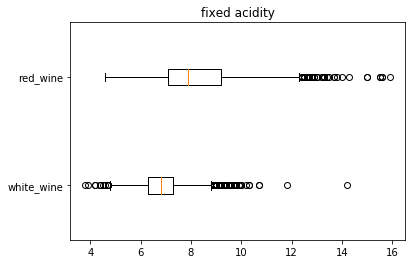

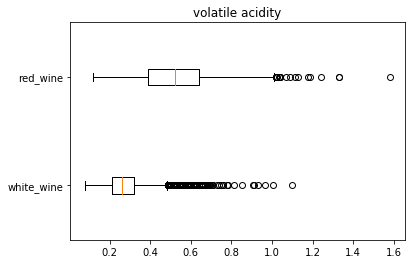

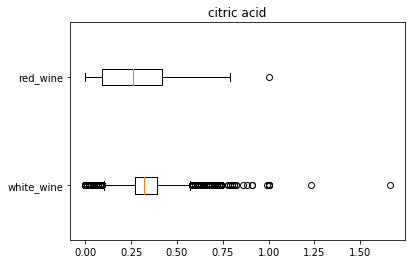

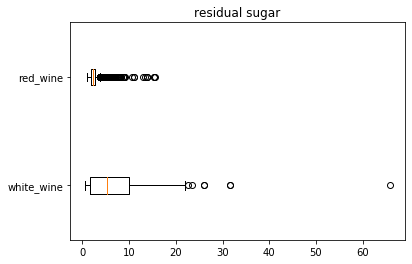

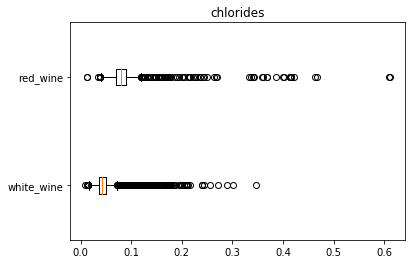

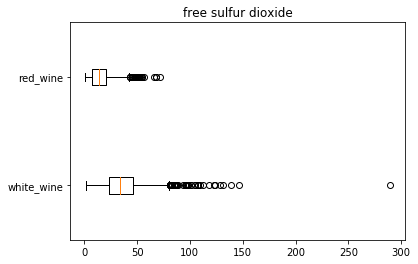

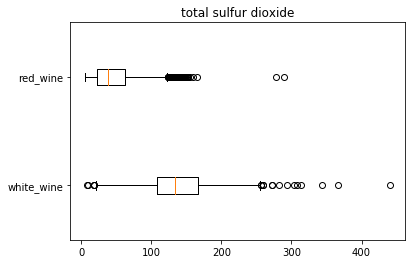

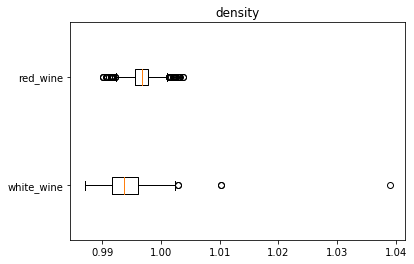

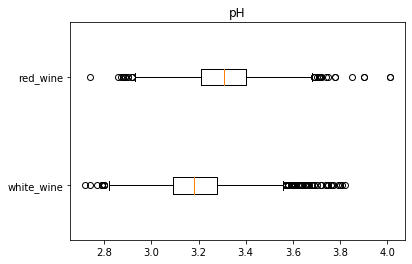

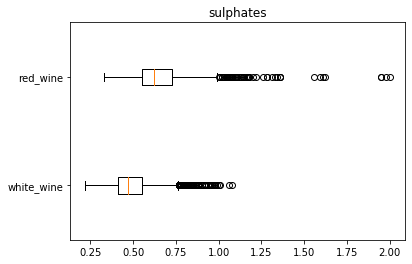

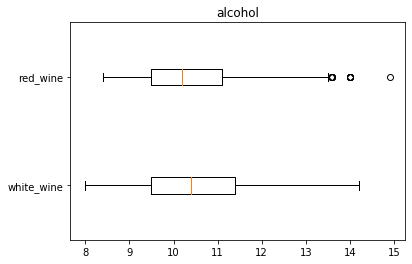

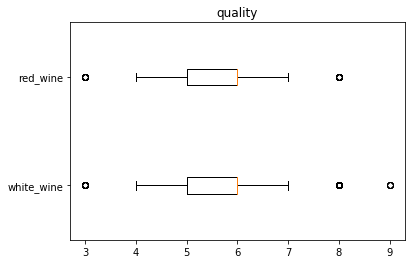

In [9]:
for feature in red_wine.columns:
    
    data = [white_wine[feature], red_wine[feature]]
    fig, ax = plt.subplots()
    ax.set_title(feature)
    ax.boxplot(data, labels=["white_wine", "red_wine"], vert=False)
    plt.show()

Let's explain each box plot for each feature separately via comparing their values


* **fixed acidity** : For red win outliers only exceed max value whereas in white win values outliers distributed over more maximum value or less than min value. Also, for this feature, most of data in red wine distributed in in wide range while in white wine is in more narrow range. In red wine data skewed a bit on left, while for white is approxiamately normal

* **volatile acidity** : For both wines outliers distributed over more maximum value, outliers are more in white data. Also, for this feature, most of data in red wine distributed in in wide range while in white wine is in more narrow range. For this feature in both data normal distrubuted. 

* **citric acid** : In white-wine data this have more much outliers and left-skewed, in red-wine data more wide range distributed and has normal distributed

* **residual sugar** : In red-wine data has a lots of outleirs and range is very narrow. On the other hand for white-wine data opposite.

* **chlorides** : Both data have lots of outliers and their distribution in narrow range with normal

* **free sulfur dioxide** : Both have same shape of data with more wide range distributed in white-data

* **total sulfur dioxide** : In red-wine data outliers more much, one max side and data is left-skewed, in white-data outliers in both side and data has normal distribution

* **density** : In red-wine data this feature has outliers on both sides and normal distribution with narrow gap. In white-data  outliers are less, wide range with normal distribution.

* **pH** : Both has similar distribution and have outliers, normal distribution(not skewed any side)

* **sulphates** : In red-wine data outliers are more further from median value

* **alcohol** : In both has the near range

* **quality** : In both has the similar distribution

# 2. CORRELATIONs

<img src='images/pearson_corr.JPG'>
<a href="https://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python">source</a>

Formula applied in numpy package

In [10]:
def pearson_correlation_coef(a, b):

    a_avg, b_avg = np.average(a), np.average(b)
    a_stdev, b_stdev = np.std(a), np.std(b)
    n = len(a)
    denominator = a_stdev * b_stdev * n
    numerator = np.sum(np.multiply(a-a_avg, b-b_avg))
    p_coef = numerator/denominator
    
    return round(p_coef, 4)

In [11]:
df_corr_red_wine = pd.DataFrame()

for i, f1 in enumerate(red_wine.columns):
    for j, f2 in enumerate(red_wine.columns):
        df_corr_red_wine.loc[f1, f2] = pearson_correlation_coef(red_wine[f1], red_wine[f2])        

In [12]:
df_corr_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.2561,0.6717,0.1148,0.0937,-0.1538,-0.1132,0.6680,-0.6830,0.1830,-0.0617,0.1241
volatile acidity,-0.2561,1.0000,-0.5525,0.0019,0.0613,-0.0105,0.0765,0.0220,0.2349,-0.2610,-0.2023,-0.3906
citric acid,0.6717,-0.5525,1.0000,0.1436,0.2038,-0.0610,0.0355,0.3649,-0.5419,0.3128,0.1099,0.2264
residual sugar,0.1148,0.0019,0.1436,1.0000,0.0556,0.1870,0.2030,0.3553,-0.0857,0.0055,0.0421,0.0137
chlorides,0.0937,0.0613,0.2038,0.0556,1.0000,0.0056,0.0474,0.2006,-0.2650,0.3713,-0.2211,-0.1289
free sulfur dioxide,-0.1538,-0.0105,-0.0610,0.1870,0.0056,1.0000,0.6677,-0.0219,0.0704,0.0517,-0.0694,-0.0507
total sulfur dioxide,-0.1132,0.0765,0.0355,0.2030,0.0474,0.6677,1.0000,0.0713,-0.0665,0.0429,-0.2057,-0.1851
density,0.6680,0.0220,0.3649,0.3553,0.2006,-0.0219,0.0713,1.0000,-0.3417,0.1485,-0.4962,-0.1749
pH,-0.6830,0.2349,-0.5419,-0.0857,-0.2650,0.0704,-0.0665,-0.3417,1.0000,-0.1966,0.2056,-0.0577
sulphates,0.1830,-0.2610,0.3128,0.0055,0.3713,0.0517,0.0429,0.1485,-0.1966,1.0000,0.0936,0.2514


Results are plotted and colored with their values

In [13]:
df_corr_red_wine.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.2561,0.6717,0.1148,0.0937,-0.1538,-0.1132,0.668,-0.683,0.183,-0.0617,0.1241
volatile acidity,-0.2561,1,-0.5525,0.0019,0.0613,-0.0105,0.0765,0.022,0.2349,-0.261,-0.2023,-0.3906
citric acid,0.6717,-0.5525,1,0.1436,0.2038,-0.061,0.0355,0.3649,-0.5419,0.3128,0.1099,0.2264
residual sugar,0.1148,0.0019,0.1436,1,0.0556,0.187,0.203,0.3553,-0.0857,0.0055,0.0421,0.0137
chlorides,0.0937,0.0613,0.2038,0.0556,1,0.0056,0.0474,0.2006,-0.265,0.3713,-0.2211,-0.1289
free sulfur dioxide,-0.1538,-0.0105,-0.061,0.187,0.0056,1,0.6677,-0.0219,0.0704,0.0517,-0.0694,-0.0507
total sulfur dioxide,-0.1132,0.0765,0.0355,0.203,0.0474,0.6677,1,0.0713,-0.0665,0.0429,-0.2057,-0.1851
density,0.668,0.022,0.3649,0.3553,0.2006,-0.0219,0.0713,1,-0.3417,0.1485,-0.4962,-0.1749
pH,-0.683,0.2349,-0.5419,-0.0857,-0.265,0.0704,-0.0665,-0.3417,1,-0.1966,0.2056,-0.0577
sulphates,0.183,-0.261,0.3128,0.0055,0.3713,0.0517,0.0429,0.1485,-0.1966,1,0.0936,0.2514


There are some relations between some features and specified as following:

 * **citric acid** and **fixed acidity** have **positive** correlation with 0.6717 value
 * **total sulfur dioxide** and **free sulfur dioxide** have **posivite** correlation with 0.6677 value
 * **density** and **fixed acidity** have **positive** correlation with value 0.668
 * **pH** and **fixed acidity** have **negative** correlation with -0.683 value
 * **pH** and **citric acid** have **negative** correlation with -0.5419 value
 * **citric acid** and **volatile acidity** have **negative** correlation with -0.5525
 * **density** and **alcohol** have **negative** correlation with value -0.4962
 * **quality** and **alcohol** have **posivite** correlations with 0.4762 value
 
* As we see relation between some features affect the other ones, for example relation between density and fixed acidity has positive and between fixed acidity and density negative relations.. 

In [14]:
df_corr_white_wine = pd.DataFrame()

for i, f1 in enumerate(white_wine.columns):
    for j, f2 in enumerate(white_wine.columns):
        df_corr_white_wine.loc[f1, f2] = pearson_correlation_coef(white_wine[f1], white_wine[f2])        

In [15]:
df_corr_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.0227,0.2892,0.0890,0.0231,-0.0494,0.0911,0.2653,-0.4259,-0.0171,-0.1209,-0.1137
volatile acidity,-0.0227,1.0000,-0.1495,0.0643,0.0705,-0.0970,0.0893,0.0271,-0.0319,-0.0357,0.0677,-0.1947
citric acid,0.2892,-0.1495,1.0000,0.0942,0.1144,0.0941,0.1211,0.1495,-0.1637,0.0623,-0.0757,-0.0092
residual sugar,0.0890,0.0643,0.0942,1.0000,0.0887,0.2991,0.4014,0.8390,-0.1941,-0.0267,-0.4506,-0.0976
chlorides,0.0231,0.0705,0.1144,0.0887,1.0000,0.1014,0.1989,0.2572,-0.0904,0.0168,-0.3602,-0.2099
free sulfur dioxide,-0.0494,-0.0970,0.0941,0.2991,0.1014,1.0000,0.6155,0.2942,-0.0006,0.0592,-0.2501,0.0082
total sulfur dioxide,0.0911,0.0893,0.1211,0.4014,0.1989,0.6155,1.0000,0.5299,0.0023,0.1346,-0.4489,-0.1747
density,0.2653,0.0271,0.1495,0.8390,0.2572,0.2942,0.5299,1.0000,-0.0936,0.0745,-0.7801,-0.3071
pH,-0.4259,-0.0319,-0.1637,-0.1941,-0.0904,-0.0006,0.0023,-0.0936,1.0000,0.1560,0.1214,0.0994
sulphates,-0.0171,-0.0357,0.0623,-0.0267,0.0168,0.0592,0.1346,0.0745,0.1560,1.0000,-0.0174,0.0537


Results are plotted and colored with their values

In [16]:
df_corr_white_wine.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.0227,0.2892,0.089,0.0231,-0.0494,0.0911,0.2653,-0.4259,-0.0171,-0.1209,-0.1137
volatile acidity,-0.0227,1,-0.1495,0.0643,0.0705,-0.097,0.0893,0.0271,-0.0319,-0.0357,0.0677,-0.1947
citric acid,0.2892,-0.1495,1,0.0942,0.1144,0.0941,0.1211,0.1495,-0.1637,0.0623,-0.0757,-0.0092
residual sugar,0.089,0.0643,0.0942,1,0.0887,0.2991,0.4014,0.839,-0.1941,-0.0267,-0.4506,-0.0976
chlorides,0.0231,0.0705,0.1144,0.0887,1,0.1014,0.1989,0.2572,-0.0904,0.0168,-0.3602,-0.2099
free sulfur dioxide,-0.0494,-0.097,0.0941,0.2991,0.1014,1,0.6155,0.2942,-0.0006,0.0592,-0.2501,0.0082
total sulfur dioxide,0.0911,0.0893,0.1211,0.4014,0.1989,0.6155,1,0.5299,0.0023,0.1346,-0.4489,-0.1747
density,0.2653,0.0271,0.1495,0.839,0.2572,0.2942,0.5299,1,-0.0936,0.0745,-0.7801,-0.3071
pH,-0.4259,-0.0319,-0.1637,-0.1941,-0.0904,-0.0006,0.0023,-0.0936,1,0.156,0.1214,0.0994
sulphates,-0.0171,-0.0357,0.0623,-0.0267,0.0168,0.0592,0.1346,0.0745,0.156,1,-0.0174,0.0537


There are some relations between some features and specified as following:

 * **residual sugar** and **density** have **positive** correlation with 0.839 value
 * **free sulfur dioxide** and **total sulfur dioxide** have **posivite** correlation with 0.6155 value
 * **total sulfur dioxide** and **density** have **posivite** correlation with 0.5299 value
 * **alcohol** and **density** have **negative** correlations with -0.7801 value
 * **alcohol** and **residual sugar** have **negative** correlations with -0.4506 value
 
* As we see relation between some features affect the other ones, for example relation between alcohol and residual sugar has negative and between residual sugar and density positive relations.. 

# 3. FISHER DISTANCE

***Fisher distance*** calculated as absulate differences between means of features in red and white wines and divided by their total of squares standart values of two same features in red and white wines

fisher_distance = (mean(x_feature_in_red_wine) + mean(x_feature_in_white_wine)) / 
(std(x_feature_in_red_wine)^2 + std(x_feature_in_white_wine)^2)

In [17]:
def fisher_distance(a, b):

    a_avg, b_avg = np.average(a), np.average(b)
    a_stdev, b_stdev = np.std(a), np.std(b)
    
    numerator = np.abs(a_avg-b_avg)
    denominator = a_stdev ** 2 + b_stdev ** 2
    
    fisher_distance = numerator/denominator
    
    return fisher_distance
    

In [18]:
df_pure_fisher = pd.DataFrame()

for f1 in white_wine.columns[:-1]:
    df_pure_fisher.loc["pure_data", f1] = fisher_distance(red_wine[f1], white_wine[f1]) 

In [19]:
df_pure_fisher

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
pure_data,0.391515,5.914233,1.202588,0.139047,15.493974,0.048762,0.031828,217.483327,2.635242,4.03247,0.034459


**Density** has maximum fisher distance with 217.48 value, followed by **chlorides** with values 15.48. So if I reduced dimentionality into two dimention, we can chose those two features

# 4. PCA and Fisher Distance

Principle component analysis steps implemented as following:

    * Subtract the mean of each variable from the dataset(this is not mandatory)
    * caculated covariance for each columns with numpy cov function
    * obtained eigen vectors and eigen values with numpy linalg eigh function
    * sorted eigen values accordding to their values descending order 
    * completed operation via apply dot product of eigen vectors and the data


In [20]:
def principle_component_analysis(X_, num_components):
    
    X = X_.copy()

    # Step-1
    # Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. ,
    # Doing this proves to be very helpful when calculating the covariance matrix.
    X_meaned = X - np.mean(X, axis=0)

    # Step-2
    cov_mat = np.cov(X_meaned, rowvar=False)

    # Step-3
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # Step-5
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    eigenvalue_subset = sorted_eigenvalue[0:num_components]

    # Step-6
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    return X_reduced, eigenvector_subset, eigenvalue_subset

In [21]:
rw_data = red_wine.drop(['quality'], axis=1)
ww_data = white_wine.drop(['quality'], axis=1)

    
* Actually before applied data normalizer(MinMax, StandarScaler) can be implemented for pca results for be better because interval of each feature are differenct range as we see in boxplots. But in here we omit it. 


In [22]:
# scaler = StandardScaler()
# scaler_rw_data = scaler.fit_transform(rw_data)
# df_scaler_rw_data = pd.DataFrame(scaler_rw_data, index=rw_data.index, columns=rw_data.columns)

In [23]:
pca_rw_data, rw_eigenvectors, rw_eigenvalues = principle_component_analysis(rw_data, rw_data.shape[1])
pca_ww_data, ww_eigenvectors, ww_eigenvalues = principle_component_analysis(ww_data, ww_data.shape[1])

In [24]:
pc_columns = []
for i in range(1, rw_data.shape[1] + 1, 1):
    pc_columns.append('PC' + str(i))
    
df_my_pca_rw_data = pd.DataFrame(data=pca_rw_data, columns=pc_columns, index=rw_data.index)
df_my_pca_ww_data = pd.DataFrame(data=pca_ww_data, columns=pc_columns, index=ww_data.index)

My pca result

In [25]:
df_my_pca_rw_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,13.224905,-2.023900,-1.126821,0.399233,1.085389,-0.198018,-0.031547,0.147051,0.006047,0.008585,0.000262
1,-22.037724,4.408322,-0.310378,0.199938,0.557109,-0.301325,-0.223874,-0.143165,-0.089312,-0.015483,0.000243
2,-7.162673,-2.501461,-0.581868,0.219069,0.552934,-0.205114,-0.136190,-0.058480,-0.084793,-0.005749,0.000346
3,-13.430063,-1.951122,2.634040,1.574059,0.063806,0.089092,0.218923,0.062244,0.006281,0.004586,-0.000747
4,13.224905,-2.023900,-1.126821,0.399233,1.085389,-0.198018,-0.031547,0.147051,0.006047,0.008585,0.000262


In [26]:
df_my_pca_ww_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-33.732754,-1.238285,12.775292,0.234922,0.088245,0.100476,-0.014614,-0.007957,-0.030343,-0.007354,-0.000267
1,11.925800,18.957519,-3.857834,1.249988,0.858999,-0.031639,-0.025850,0.036137,0.033946,-0.007053,-0.000498
2,41.224671,-5.739874,2.466032,0.953471,-1.192391,-0.171030,0.030876,0.081910,0.060987,0.005064,0.000640
3,-49.087353,1.213107,-0.193184,0.048469,-0.254910,0.011453,0.058192,0.093215,-0.066148,0.010212,0.000174
4,-49.087353,1.213107,-0.193184,0.048469,-0.254910,0.011453,0.058192,0.093215,-0.066148,0.010212,0.000174


Additionally we used pca function of sklearn library for camparing my pca results and sklearn lib pca results

In [27]:
rw_data = red_wine.drop(['quality'], axis=1)
pca_r = PCA(n_components=rw_data.shape[1])
principalComponents_r = pca_r.fit_transform(rw_data)
df_pca_rw_data = pd.DataFrame(data=principalComponents_r, columns=pc_columns, index=rw_data.index)
df_pca_rw_data_ori = df_pca_rw_data.copy()

In [28]:
df_pca_rw_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,0.223874,0.143165,-0.089312,-0.015483,0.000243
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,0.136190,0.058480,-0.084793,-0.005749,0.000346
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,-0.218923,-0.062244,0.006281,0.004586,-0.000747
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262


In [29]:
ww_data = white_wine.drop(['quality'], axis=1)
pca_w = PCA(n_components=ww_data.shape[1])
principalComponents_w = pca_w.fit_transform(ww_data)
df_pca_ww_data = pd.DataFrame(data=principalComponents_w, columns=pc_columns, index=ww_data.index)
df_pca_ww_data_ori = df_pca_ww_data.copy()

In [30]:
df_pca_ww_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,33.732754,1.238285,12.775292,-0.234922,-0.088245,-0.100476,0.014614,0.007957,-0.030343,-0.007354,0.000267
1,-11.925800,-18.957519,-3.857834,-1.249988,-0.858999,0.031639,0.025850,-0.036137,0.033946,-0.007053,0.000498
2,-41.224671,5.739874,2.466032,-0.953471,1.192391,0.171030,-0.030876,-0.081910,0.060987,0.005064,-0.000640
3,49.087353,-1.213107,-0.193184,-0.048469,0.254910,-0.011453,-0.058192,-0.093215,-0.066148,0.010212,-0.000174
4,49.087353,-1.213107,-0.193184,-0.048469,0.254910,-0.011453,-0.058192,-0.093215,-0.066148,0.010212,-0.000174


As we see our pca and sklearn pca results are the same values but for same columns have opponent sign. So we have used sklearn pca results to resque unconsistincy results

In [31]:
def get_df_pca_columns_with_original_column_names(data, pca):

    # number of components
    n_pcs= pca.components_.shape[0]

    # get the index of the most important feature on EACH component i.e. largest absolute value
    # using LIST COMPREHENSION HERE
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

    initial_feature_names = list(data.columns)

    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # using LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df = pd.DataFrame(sorted(dic.items()))
    
    return df


In above function we can get original data features name applied sklearn pca as mentioned in <a href='https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn'> here </a> 

In [32]:
rw_column_df = get_df_pca_columns_with_original_column_names(rw_data, pca_r)
ww_column_df = get_df_pca_columns_with_original_column_names(ww_data, pca_w)

In [33]:
rw_column_df

,0,1
0,PC1,total sulfur dioxide
1,PC10,chlorides
2,PC11,density
3,PC2,free sulfur dioxide
4,PC3,fixed acidity
5,PC4,residual sugar
6,PC5,alcohol
7,PC6,volatile acidity
8,PC7,sulphates
9,PC8,pH


In [34]:
ww_column_df

,0,1
0,PC1,total sulfur dioxide
1,PC10,chlorides
2,PC11,density
3,PC2,free sulfur dioxide
4,PC3,residual sugar
5,PC4,alcohol
6,PC5,fixed acidity
7,PC6,pH
8,PC7,citric acid
9,PC8,sulphates


Rename pca feature with its original feature names via using dict

In [35]:
dict_names_rw = pd.Series(rw_column_df[1].values, index=rw_column_df[0]).to_dict()
dict_names_ww = pd.Series(ww_column_df[1].values, index=ww_column_df[0]).to_dict()

In [36]:
df_pca_rw_data.rename(columns = dict_names_rw, inplace = True) 
df_pca_ww_data.rename(columns = dict_names_ww, inplace = True) 

In [37]:
df_pca_rw_data.head()

,total sulfur dioxide,free sulfur dioxide,fixed acidity,residual sugar,alcohol,volatile acidity,sulphates,pH,citric acid,chlorides,density
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,0.223874,0.143165,-0.089312,-0.015483,0.000243
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,0.136190,0.058480,-0.084793,-0.005749,0.000346
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,-0.218923,-0.062244,0.006281,0.004586,-0.000747
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262


In [38]:
df_pca_ww_data.head()

,total sulfur dioxide,free sulfur dioxide,residual sugar,alcohol,fixed acidity,pH,citric acid,sulphates,volatile acidity,chlorides,density
0,33.732754,1.238285,12.775292,-0.234922,-0.088245,-0.100476,0.014614,0.007957,-0.030343,-0.007354,0.000267
1,-11.925800,-18.957519,-3.857834,-1.249988,-0.858999,0.031639,0.025850,-0.036137,0.033946,-0.007053,0.000498
2,-41.224671,5.739874,2.466032,-0.953471,1.192391,0.171030,-0.030876,-0.081910,0.060987,0.005064,-0.000640
3,49.087353,-1.213107,-0.193184,-0.048469,0.254910,-0.011453,-0.058192,-0.093215,-0.066148,0.010212,-0.000174
4,49.087353,-1.213107,-0.193184,-0.048469,0.254910,-0.011453,-0.058192,-0.093215,-0.066148,0.010212,-0.000174


In [39]:
df_pca_fisher = pd.DataFrame()
for f1 in df_pca_ww_data.columns:
    df_pca_fisher.loc["pca_data", f1] = fisher_distance(df_pca_rw_data[f1], df_pca_ww_data[f1]) 

In [40]:
df_pca_fisher

,total sulfur dioxide,free sulfur dioxide,residual sugar,alcohol,fixed acidity,pH,citric acid,sulphates,volatile acidity,chlorides,density
pca_data,1.340822e-18,5.410794e-18,1.735083e-18,3.195989e-16,2.422000e-16,6.765779e-15,8.370187e-15,3.948588e-15,2.393932e-15,3.195311e-14,6.405426e-11


**Density** has maximum fisher distance with 6.405426e-11 value, followed by **chlorides** with values 3.195311e-14. So if I reduced dimentionality into two dimention, we can chose those two features.


In [41]:
df_fisher = pd.concat([df_pure_fisher, df_pca_fisher], sort=False)
df_fisher

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
pure_data,3.915152e-01,5.914233e+00,1.202588e+00,1.390474e-01,1.549397e+01,4.876209e-02,3.182831e-02,2.174833e+02,2.635242e+00,4.032470e+00,3.445906e-02
pca_data,2.422000e-16,2.393932e-15,8.370187e-15,1.735083e-18,3.195311e-14,5.410794e-18,1.340822e-18,6.405426e-11,6.765779e-15,3.948588e-15,3.195989e-16


As we see before both maximum fisher distances(in original data and after pca applied) are the same features.

In [42]:
eigen_values_dict_names_rw = pd.Series(pca_r.explained_variance_, index=df_pca_rw_data.columns).to_dict()
eigen_values_dict_names_ww = pd.Series(pca_w.explained_variance_, index=df_pca_ww_data.columns).to_dict()

In [43]:
eigen_values_dict_names_rw

{'total sulfur dioxide': 1133.8070755113813,
 'free sulfur dioxide': 57.93541077477589,
 'fixed acidity': 3.101302284183163,
 'residual sugar': 1.8194153155263988,
 'alcohol': 1.0463403600411831,
 'volatile acidity': 0.04139672938211751,
 'sulphates': 0.02319265777853163,
 'pH': 0.01134646854369882,
 'citric acid': 0.010077984126299684,
 'chlorides': 0.0014549975485606906,
 'density': 5.614826673229536e-07}

In [44]:
eigen_values_dict_names_ww

{'total sulfur dioxide': 1931.5133157556152,
 'free sulfur dioxide': 168.452894944071,
 'residual sugar': 21.56099321438453,
 'alcohol': 1.0744203190040373,
 'fixed acidity': 0.6867086338130327,
 'pH': 0.018531883309064728,
 'citric acid': 0.014289805087294114,
 'sulphates': 0.011446104927402556,
 'volatile acidity': 0.00864204554993922,
 'chlorides': 0.0003960569839009528,
 'density': 3.168392615457504e-07}

As we see fisher distance and eigen values are negative correlation. Eigen value of density is minimum and chlorides follow it..

# 5. SCATTER PLOT on PCA FEATURES

First concat two wine data with concat function 

In [45]:
wine_data = pd.concat([rw_data, ww_data], axis=0)
wine_data.reset_index(drop=True, inplace=True)

In [46]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Then, attempt each row belong to data type red-wine or white-wine as target

In [47]:
wine_target = pd.DataFrame(["red"] * red_wine.shape[0] + ["white"] * white_wine.shape[0], columns=["target"])

Shuffle both wine data and their target with using shuffle method and show head data

In [48]:
wine_data, wine_target = shuffle(wine_data, wine_target)

In [49]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5097,6.4,0.30,0.36,2.0,0.052,18.0,141.0,0.99273,3.38,0.53,10.50
1477,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.60
5917,6.3,0.41,0.22,7.3,0.035,23.0,117.0,0.99172,3.20,0.39,11.94
474,10.5,0.28,0.51,1.7,0.080,10.0,24.0,0.99820,3.20,0.89,9.40
4113,6.9,0.34,0.30,4.7,0.029,34.0,148.0,0.99165,3.36,0.49,12.30


Apply pca and attempt column names as PC1,PC2, .. PC11

In [50]:
pc_columns_wine = []
for i in range(1, wine_data.shape[1] + 1, 1):
    pc_columns_wine.append('PC' + str(i))

In [51]:
pca_wine = PCA(n_components=wine_data.shape[1])
principalComponents_wine = pca_wine.fit_transform(wine_data)
df_wine_data_reduced = pd.DataFrame(data=principalComponents_wine, columns=pc_columns_wine, index=wine_target.index)

In [52]:
df_wine_data_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
5097,21.530346,-18.086852,-4.012113,-0.491024,-0.468154,0.032226,0.110321,-0.086856,0.045661,0.001493,-0.000412
1477,-29.484514,-7.980247,-2.179117,-3.261088,1.314192,0.408603,0.257872,0.129967,-0.094956,-0.002219,0.001189
5917,-0.438933,-7.566533,1.867028,-1.698513,0.883632,0.057313,-0.156411,0.006677,0.013041,0.002679,-0.000693
474,-94.093752,1.176077,0.288007,3.050291,-0.038879,-0.125355,0.301661,0.021674,-0.068804,-0.024108,-0.000807
4113,32.120427,-4.091467,-2.147325,-0.978568,1.537064,0.165309,0.003137,-0.098110,0.004078,-0.001545,-0.000675


Take wine data on two most and two least important features with target data which is quality and show results

In [53]:
most_two_component_data = df_wine_data_reduced[['PC1','PC2']]
least_two_component_data = df_wine_data_reduced[['PC10','PC11']]

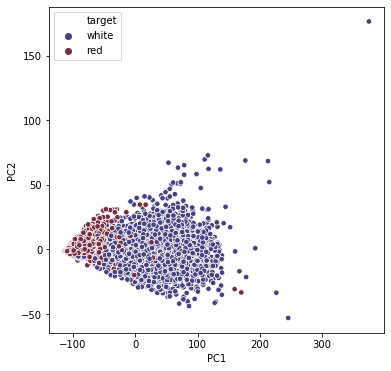

In [54]:
#Concat it with target variable to create a complete Dataset
df_most_two_component_data = pd.concat([most_two_component_data, wine_target], axis = 1)

plt.figure(figsize=(6, 6))
sb.scatterplot(data=df_most_two_component_data, x='PC1', y='PC2', hue='target', s=30, palette='icefire')
plt.show()

Using the most important features that are PC1 and PC2, we see in above figure, red and white wine saples are more seperatable with each other and we will obtain good result when it will be used for a classification task

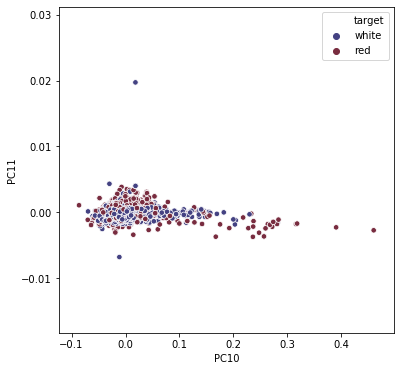

In [55]:
#Concat it with target variable to create a complete Dataset
df_least_two_component_data = pd.concat([least_two_component_data, wine_target], axis = 1)

plt.figure(figsize=(6, 6))
sb.scatterplot(data=df_least_two_component_data, x='PC10', y='PC11', hue='target', s=30, palette='icefire')
plt.show()

On the other hand, using the least important features that are PC10 and PC11, we see in above figure, red and white wine saples are intersection with each other and we will not good result when it will be used for a classification task

# 6. K-MEANS, K-CENCTERS, FARTHEST-FIRST, DBSCAN, SOM ALGORITHMS

In here, we first apply algorithms on original data and pca two most important features data, then compare results and visualize their results on two dimentional scatter plots

#### a. K-MEANS

K-means algorithm not coded from strach instead used sklearn KMeans alogrithm. Quality column removed from both red-wine and white-wine data and using this target quality data for comparing algorithm scores

In [56]:
# n_cluster = max quality value
c_cluster_r = max(red_wine['quality'])
c_cluster_r

8

In [57]:
kmeans = KMeans(n_clusters=c_cluster_r, random_state=53)
rw_y_pred_ori_kmeans = kmeans.fit_predict(rw_data)

rw_y_pred_ori_kmeans = pd.DataFrame([y+1 for y in rw_y_pred_ori_kmeans], columns=["quality"])
rw_y_true_ori_kmeans = red_wine[['quality']]

Quality sample sizes for each cluster for actual red-wine data quality shown in following graph

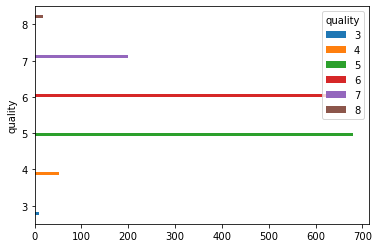

In [58]:
rw_y_true_ori_kmeans.groupby('quality').quality.value_counts().unstack(0).plot.barh()

Quality sample sizes for each cluster for prediction red-wine data quality shown in following graph

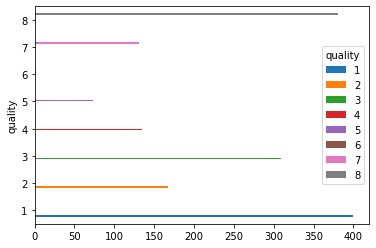

In [59]:
rw_y_pred_ori_kmeans.groupby('quality').quality.value_counts().unstack(0).plot.barh()

In red-wine data for each quality sample sizes are shown as above graphs and it has total 6 cluster while in our case we choose max quality number which is 8 as cluster numbers. So actually results are not good when we select max quality as cluster number. So we choose the same operation via give 6 as cluster number.

In [60]:
kmeans = KMeans(n_clusters=6, random_state=53)
rw_y_pred_ori_kmeans = kmeans.fit_predict(rw_data)

rw_y_pred_ori_kmeans = pd.DataFrame([y+1 for y in rw_y_pred_ori_kmeans], columns=["quality"])
rw_y_true_ori_kmeans = red_wine[['quality']]

Quality sample sizes for each cluster for actual in red-wine quality data shown in following graph

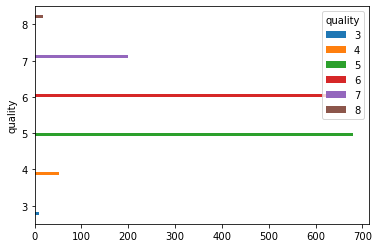

In [61]:
rw_y_true_ori_kmeans.groupby('quality').quality.value_counts().unstack(0).plot.barh()

Quality sample sizes for each cluster for prediction in red-wine data quality shown in following graph

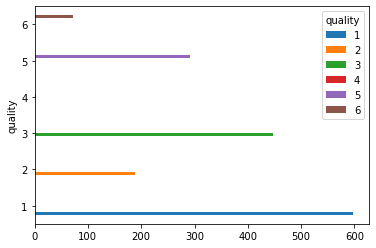

In [62]:
rw_y_pred_ori_kmeans.groupby('quality').quality.value_counts().unstack(0).plot.barh()

As we see, when we select number cluster with same actual cluster size our result are better. 

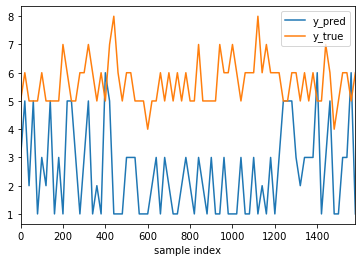

In [63]:
df = pd.DataFrame({"sample index": list(range(len(rw_y_true_ori_kmeans["quality"]))[::20]),
                   "y_pred" : list(rw_y_pred_ori_kmeans["quality"])[::20],
                   "y_true" : list(rw_y_true_ori_kmeans["quality"])[::20] })

df.plot(x="sample index", y=["y_pred", "y_true"])
plt.show()

I show every 20 point prediction cluster and real cluster value as graphically. Their values actual parallel, so result we cay cluster results are similar

**Note**: cluster number don't importance for us, we pay attention on distribution on sample sizes on each clusters)

### Results on two most important features and their visualization

Let's show head pca results that obtained in section 4.

In [64]:
df_pca_rw_data_ori.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,0.223874,0.143165,-0.089312,-0.015483,0.000243
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,0.136190,0.058480,-0.084793,-0.005749,0.000346
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,-0.218923,-0.062244,0.006281,0.004586,-0.000747
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262


In [65]:
df_pca_ww_data_ori.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,33.732754,1.238285,12.775292,-0.234922,-0.088245,-0.100476,0.014614,0.007957,-0.030343,-0.007354,0.000267
1,-11.925800,-18.957519,-3.857834,-1.249988,-0.858999,0.031639,0.025850,-0.036137,0.033946,-0.007053,0.000498
2,-41.224671,5.739874,2.466032,-0.953471,1.192391,0.171030,-0.030876,-0.081910,0.060987,0.005064,-0.000640
3,49.087353,-1.213107,-0.193184,-0.048469,0.254910,-0.011453,-0.058192,-0.093215,-0.066148,0.010212,-0.000174
4,49.087353,-1.213107,-0.193184,-0.048469,0.254910,-0.011453,-0.058192,-0.093215,-0.066148,0.010212,-0.000174


Take two most important features for both datasets and visualize their with algorith results

#### Red-wine data results

In [66]:
rw_most_two_component_data = df_pca_rw_data_ori[['PC1', 'PC2']]
X_r = rw_most_two_component_data.copy()

Apply k-means on two most important features data with cluster number as max quality number

In [67]:
kmeans = KMeans(n_clusters=c_cluster_r, random_state=53)
rw_y_pred_kmeans = kmeans.fit_predict(rw_most_two_component_data)

Visualize results on scatter plots

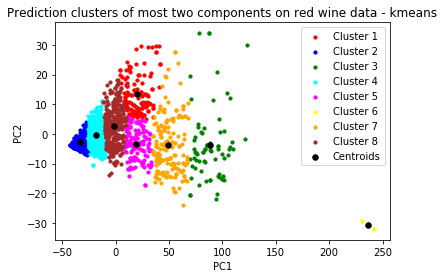

In [68]:
# Visualising the clusters
plt.scatter(X_r.loc[rw_y_pred_kmeans == 0, "PC1"], X_r.loc[rw_y_pred_kmeans == 0, "PC2"], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 1, "PC1"], X_r.loc[rw_y_pred_kmeans == 1, "PC2"], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 2, "PC1"], X_r.loc[rw_y_pred_kmeans == 2, "PC2"], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 3, "PC1"], X_r.loc[rw_y_pred_kmeans == 3, "PC2"], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 4, "PC1"], X_r.loc[rw_y_pred_kmeans == 4, "PC2"], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 5, "PC1"], X_r.loc[rw_y_pred_kmeans == 5, "PC2"], s = 10, c = 'yellow', label = 'Cluster 6')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 6, "PC1"], X_r.loc[rw_y_pred_kmeans == 6, "PC2"], s = 10, c = 'orange', label = 'Cluster 7')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 7, "PC1"], X_r.loc[rw_y_pred_kmeans == 7, "PC2"], s = 10, c = 'brown', label = 'Cluster 8')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.title('Prediction clusters of most two components on red wine data - kmeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Each cluster data are within each other but although cluster results not bad. As we see in right botttom figure only two points seperated as different clusters, actually those are much more similar outliers, but kmeans assign them as different cluster. This is not good

In [69]:
pd.unique(red_wine['quality'])

array([5, 6, 7, 4, 8, 3], dtype=int64)

We repeat the same operation for slecting cluster number as 6 that is our real cluster numbers and compare visualize results

In [70]:
rw_most_two_component_data = df_pca_rw_data_ori[['PC1', 'PC2']]
X_r = rw_most_two_component_data.copy()

In [71]:
kmeans = KMeans(n_clusters=6, random_state=53)
rw_y_pred_kmeans = kmeans.fit_predict(rw_most_two_component_data)

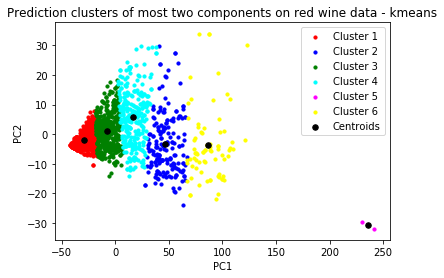

In [72]:
# Visualising the clusters
plt.scatter(X_r.loc[rw_y_pred_kmeans == 0, "PC1"], X_r.loc[rw_y_pred_kmeans == 0, "PC2"], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 1, "PC1"], X_r.loc[rw_y_pred_kmeans == 1, "PC2"], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 2, "PC1"], X_r.loc[rw_y_pred_kmeans == 2, "PC2"], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 3, "PC1"], X_r.loc[rw_y_pred_kmeans == 3, "PC2"], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 4, "PC1"], X_r.loc[rw_y_pred_kmeans == 4, "PC2"], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_r.loc[rw_y_pred_kmeans == 5, "PC1"], X_r.loc[rw_y_pred_kmeans == 5, "PC2"], s = 10, c = 'yellow', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.title('Prediction clusters of most two components on red wine data - kmeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [73]:
rw_y_true_kmeans = red_wine['quality']

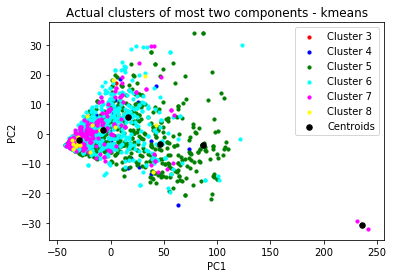

In [74]:
# Visualising the clusters
plt.scatter(X_r.loc[rw_y_true_kmeans == 3, "PC1"], X_r.loc[rw_y_true_kmeans == 3, "PC2"], s = 10, c = 'red', label = 'Cluster 3')
plt.scatter(X_r.loc[rw_y_true_kmeans == 4, "PC1"], X_r.loc[rw_y_true_kmeans == 4, "PC2"], s = 10, c = 'blue', label = 'Cluster 4')
plt.scatter(X_r.loc[rw_y_true_kmeans == 5, "PC1"], X_r.loc[rw_y_true_kmeans == 5, "PC2"], s = 10, c = 'green', label = 'Cluster 5')
plt.scatter(X_r.loc[rw_y_true_kmeans == 6, "PC1"], X_r.loc[rw_y_true_kmeans == 6, "PC2"], s = 10, c = 'cyan', label = 'Cluster 6')
plt.scatter(X_r.loc[rw_y_true_kmeans == 7, "PC1"], X_r.loc[rw_y_true_kmeans == 7, "PC2"], s = 10, c = 'magenta', label = 'Cluster 7')
plt.scatter(X_r.loc[rw_y_true_kmeans == 8, "PC1"], X_r.loc[rw_y_true_kmeans == 8, "PC2"], s = 10, c = 'yellow', label = 'Cluster 8')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.title('Actual clusters of most two components - kmeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

As we see actual clusters samples and our predicted assigned results are different clusters for two most important features data 

#### White-wine data results

The same operations made for white-wine datasets

In [75]:
ww_most_two_component_data = df_pca_ww_data_ori[['PC1', 'PC2']]
X_w = ww_most_two_component_data.copy()

Apply k-means on two most important features data with cluster number as max quality number

In [76]:
c_cluster_w = max(white_wine['quality'])
kmeans = KMeans(n_clusters=c_cluster_w, random_state=53)
ww_y_pred_kmeans = kmeans.fit_predict(ww_most_two_component_data)

Visualize results on scatter plots

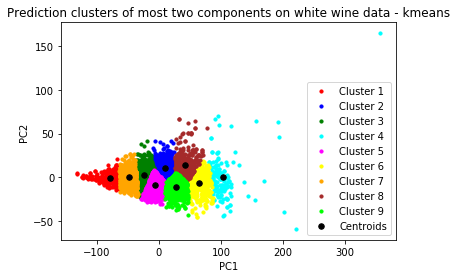

In [77]:
# Visualising the clusters
plt.scatter(X_w.loc[ww_y_pred_kmeans == 0, "PC1"], X_w.loc[ww_y_pred_kmeans == 0, "PC2"], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 1, "PC1"], X_w.loc[ww_y_pred_kmeans == 1, "PC2"], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 2, "PC1"], X_w.loc[ww_y_pred_kmeans == 2, "PC2"], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 3, "PC1"], X_w.loc[ww_y_pred_kmeans == 3, "PC2"], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 4, "PC1"], X_w.loc[ww_y_pred_kmeans == 4, "PC2"], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 5, "PC1"], X_w.loc[ww_y_pred_kmeans == 5, "PC2"], s = 10, c = 'yellow', label = 'Cluster 6')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 6, "PC1"], X_w.loc[ww_y_pred_kmeans == 6, "PC2"], s = 10, c = 'orange', label = 'Cluster 7')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 7, "PC1"], X_w.loc[ww_y_pred_kmeans == 7, "PC2"], s = 10, c = 'brown', label = 'Cluster 8')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 8, "PC1"], X_w.loc[ww_y_pred_kmeans == 8, "PC2"], s = 10, c = 'lime', label = 'Cluster 9')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.title('Prediction clusters of most two components on white wine data - kmeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Each cluster data are within each other but in here outlier points not seperated as different cluster. This is not good

In [78]:
pd.unique(white_wine['quality'])

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

We repeat the same operation for slecting cluster number as 7 that is our real cluster numbers and compare visualize results

In [79]:
kmeans = KMeans(n_clusters=7, random_state=53)
ww_y_pred_kmeans = kmeans.fit_predict(ww_most_two_component_data)

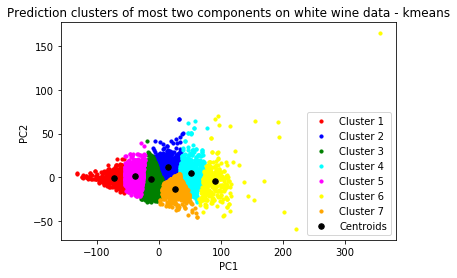

In [80]:
# Visualising the clusters
plt.scatter(X_w.loc[ww_y_pred_kmeans == 0, "PC1"], X_w.loc[ww_y_pred_kmeans == 0, "PC2"], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 1, "PC1"], X_w.loc[ww_y_pred_kmeans == 1, "PC2"], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 2, "PC1"], X_w.loc[ww_y_pred_kmeans == 2, "PC2"], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 3, "PC1"], X_w.loc[ww_y_pred_kmeans == 3, "PC2"], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 4, "PC1"], X_w.loc[ww_y_pred_kmeans == 4, "PC2"], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 5, "PC1"], X_w.loc[ww_y_pred_kmeans == 5, "PC2"], s = 10, c = 'yellow', label = 'Cluster 6')
plt.scatter(X_w.loc[ww_y_pred_kmeans == 6, "PC1"], X_w.loc[ww_y_pred_kmeans == 6, "PC2"], s = 10, c = 'orange', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.title('Prediction clusters of most two components on white wine data - kmeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [81]:
ww_y_true_kmeans = white_wine['quality']

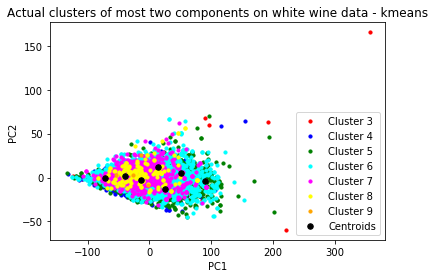

In [82]:
# Visualising the clusters
plt.scatter(X_w.loc[ww_y_true_kmeans == 3, "PC1"], X_w.loc[ww_y_true_kmeans == 3, "PC2"], s = 10, c = 'red', label = 'Cluster 3')
plt.scatter(X_w.loc[ww_y_true_kmeans == 4, "PC1"], X_w.loc[ww_y_true_kmeans == 4, "PC2"], s = 10, c = 'blue', label = 'Cluster 4')
plt.scatter(X_w.loc[ww_y_true_kmeans == 5, "PC1"], X_w.loc[ww_y_true_kmeans == 5, "PC2"], s = 10, c = 'green', label = 'Cluster 5')
plt.scatter(X_w.loc[ww_y_true_kmeans == 6, "PC1"], X_w.loc[ww_y_true_kmeans == 6, "PC2"], s = 10, c = 'cyan', label = 'Cluster 6')
plt.scatter(X_w.loc[ww_y_true_kmeans == 7, "PC1"], X_w.loc[ww_y_true_kmeans == 7, "PC2"], s = 10, c = 'magenta', label = 'Cluster 7')
plt.scatter(X_w.loc[ww_y_true_kmeans == 8, "PC1"], X_w.loc[ww_y_true_kmeans == 8, "PC2"], s = 10, c = 'yellow', label = 'Cluster 8')
plt.scatter(X_w.loc[ww_y_true_kmeans == 9, "PC1"], X_w.loc[ww_y_true_kmeans == 9, "PC2"], s = 10, c = 'orange', label = 'Cluster 9')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.title('Actual clusters of most two components on white wine data - kmeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

As we see actual clusters samples and our predicted assigned results are different clusters for two most important features data 

So, using only two most features data is actually comparing with using original data features not better via only looking visualization. Using all data features give better results

#### b. DBSCAN

For DBSCAN algorithm, we also used sklearn library DBSCAN algorithm.
Select epsilon as 3 and min sample point as 2

##### Red-wine data

First apply dbscan algorith on pca red wine data set and visualize the most two importance features data 

In [83]:
dbscan_clusters_r= DBSCAN(eps=3, min_samples=2).fit(df_pca_rw_data)
rw_y_pred_dbscan = dbscan_clusters_r.labels_

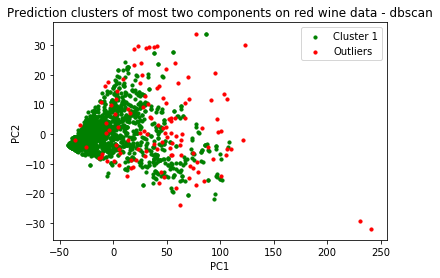

In [84]:
# Visualising the clusters
plt.scatter(X_r.loc[rw_y_pred_dbscan != -1, "PC1"], X_r.loc[rw_y_pred_dbscan != -1, "PC2"], s = 10, c = 'green', label = 'Cluster 1')
plt.scatter(X_r.loc[rw_y_pred_dbscan == -1, "PC1"], X_r.loc[rw_y_pred_dbscan == -1, "PC2"], s = 10, c = 'red', label = 'Outliers')
plt.title('Prediction clusters of most two components on red wine data - dbscan')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Using all pca data actually not not seperated outliers from data

Then, dbscan algorithm applied only two most important features data

In [85]:
dbscan_clusters_r= DBSCAN(eps=3, min_samples=2).fit(rw_most_two_component_data)
rw_y_pred_dbscan = dbscan_clusters_r.labels_

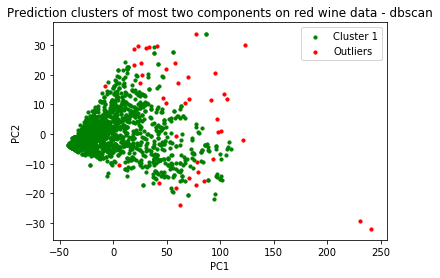

In [86]:
# Visualising the clusters
plt.scatter(X_r.loc[rw_y_pred_dbscan != -1, "PC1"], X_r.loc[rw_y_pred_dbscan != -1, "PC2"], s = 10, c = 'green', label = 'Cluster 1')
plt.scatter(X_r.loc[rw_y_pred_dbscan == -1, "PC1"], X_r.loc[rw_y_pred_dbscan == -1, "PC2"], s = 10, c = 'red', label = 'Outliers')
plt.title('Prediction clusters of most two components on red wine data - dbscan')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Using two most important features data give more better results with seperated outliers from data

##### White-wine data

First apply dbscan algorith on pca white wine data set and visualize the most two importance features data 

In [87]:
dbscan_clusters_w= DBSCAN(eps=3, min_samples=2).fit(df_pca_ww_data)
ww_y_pred_dbscan = dbscan_clusters_w.labels_

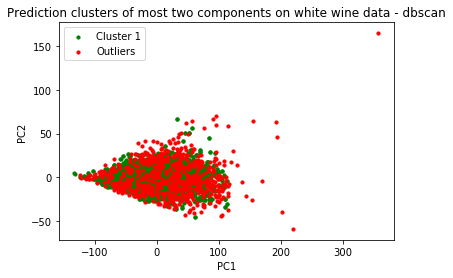

In [88]:
# Visualising the clusters
plt.scatter(X_w.loc[ww_y_pred_dbscan != -1, "PC1"], X_w.loc[ww_y_pred_dbscan != -1, "PC2"], s = 10, c = 'green', label = 'Cluster 1')
plt.scatter(X_w.loc[ww_y_pred_dbscan == -1, "PC1"], X_w.loc[ww_y_pred_dbscan == -1, "PC2"], s = 10, c = 'red', label = 'Outliers')
plt.title('Prediction clusters of most two components on white wine data - dbscan')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Using all pca data actually not not seperated outliers from data

Then, dbscan algorithm applied only two most important features data

In [89]:
dbscan_clusters_w= DBSCAN(eps=3, min_samples=2).fit(ww_most_two_component_data)
ww_y_pred_dbscan = dbscan_clusters_w.labels_

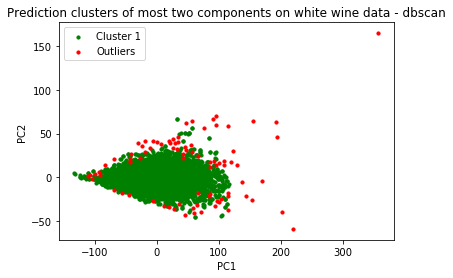

In [90]:
# Visualising the clusters
plt.scatter(X_w.loc[ww_y_pred_dbscan != -1, "PC1"], X_w.loc[ww_y_pred_dbscan != -1, "PC2"], s = 10, c = 'green', label = 'Cluster 1')
plt.scatter(X_w.loc[ww_y_pred_dbscan == -1, "PC1"], X_w.loc[ww_y_pred_dbscan == -1, "PC2"], s = 10, c = 'red', label = 'Outliers')
plt.title('Prediction clusters of most two components on white wine data - dbscan')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Using two most important features data give more better results with seperated outliers from data

### c. K-CENTER and FARTHEST-FIRST Algorithms

K-centers and Farthest-first algorithms are coded from stratch and implemented according to pseudue code as specified following.

Those algorithms are applied on two most important features data, not applied on original data because of take long time

### k centers algorithm
----------------------------
- X original data set, X={x1, x2,..xn}
- X' -> X.copy()
- w  -> keep centers our data set
- r  -> radious (e.g = 3)
- k  -> number cluster(e.g: k= 5)

- while True: 
    - X' = X.copy()
    - while X' is not empty:
        - pick a data in X'(randomly) and add it to w
        - delete all the data in X' that are within r from the center point we picked

    - if length(w) == k, break
    - elif length(w) > k, increase r
    - else length(w) < k, decrease r 

- then, w attempt each sample to closest clusters

#### Red-wine data

radious 20 selected and increased or decreased with with each step with 0.05. 

Cluster number also selected max quality value 

Euclidian distance used

In [91]:
rw_most_two_component_data = df_pca_rw_data_ori[['PC1', 'PC2']]

k_r = c_cluster_r
w = pd.DataFrame()
r = 20
remove_n = 1
np.random.seed(0)
iter_num = 0

while True:
    X_r = rw_most_two_component_data.copy()
    w = pd.DataFrame()
    while X_r.shape[0] != 0:
        drop_index = np.random.choice(X_r.index, remove_n, replace=False)[0]
        w.loc[drop_index, "PC1"] = X_r.loc[drop_index, "PC1"]
        w.loc[drop_index, "PC2"] = X_r.loc[drop_index, "PC2"]
        picked_data = X_r.loc[drop_index]
        X_r.drop([drop_index], inplace=True)

        distances = X_r.apply(lambda row: np.linalg.norm(row.values - picked_data.values), axis=1)
        within_distance_indices = distances[distances < r].index
        X_r.drop(within_distance_indices, inplace=True)   

    if w.shape[0] == k_r:
        break
    elif w.shape[0] > k_r:
        r += 0.05
    else:
        r -= 0.05
        
    iter_num += 1
    
print("r:", r, "iter_num: ", iter_num)

r: 26.750000000000096 iter_num:  135


Optimal radious value find as 26.75 and total in 135 iteration

In [92]:
w

,PC1,PC2
166,53.677901,-9.837014
37,-16.694337,0.791151
213,20.734959,7.762324
637,99.443307,-6.866180
57,69.489264,19.406115
584,41.044938,29.771530
1079,230.674270,-29.496431
1244,123.163740,30.060277


Our centers samples are selected as above with 166.th, 37.th, .. 1244.th samples

After find ours centers as clusters, find closest cluster for each sample in data via using euclidian distance and visualize them

In [93]:
X_new_r = rw_most_two_component_data.copy()
for i, row_r in X_new_r.iterrows():
    distances = w.apply(lambda row: np.linalg.norm(row.values - row_r.values), axis=1)
    min_distance_index = distances[distances == distances.min()].index[0]
    X_new_r.loc[i, "cluster"] = min_distance_index 
    
X_new_r["cluster"] = X_new_r["cluster"].astype(int)
le = LabelEncoder()
X_new_r["cluster"] = le.fit_transform(X_new_r.cluster.values)
rw_y_pred_kcenters = X_new_r["cluster"]

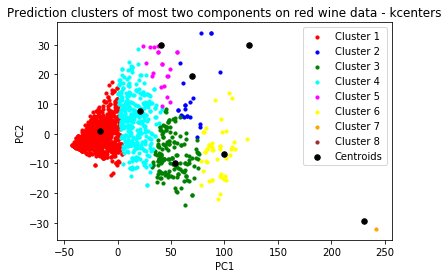

In [94]:
# Visualising the clusters
plt.scatter(X_new_r.loc[rw_y_pred_kcenters == 0, "PC1"], X_new_r.loc[rw_y_pred_kcenters == 0, "PC2"], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_new_r.loc[rw_y_pred_kcenters == 1, "PC1"], X_new_r.loc[rw_y_pred_kcenters == 1, "PC2"], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_new_r.loc[rw_y_pred_kcenters == 2, "PC1"], X_new_r.loc[rw_y_pred_kcenters == 2, "PC2"], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_new_r.loc[rw_y_pred_kcenters == 3, "PC1"], X_new_r.loc[rw_y_pred_kcenters == 3, "PC2"], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_new_r.loc[rw_y_pred_kcenters == 4, "PC1"], X_new_r.loc[rw_y_pred_kcenters == 4, "PC2"], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_new_r.loc[rw_y_pred_kcenters == 5, "PC1"], X_new_r.loc[rw_y_pred_kcenters == 5, "PC2"], s = 10, c = 'yellow', label = 'Cluster 6')
plt.scatter(X_new_r.loc[rw_y_pred_kcenters == 6, "PC1"], X_new_r.loc[rw_y_pred_kcenters == 6, "PC2"], s = 10, c = 'orange', label = 'Cluster 7')
plt.scatter(X_new_r.loc[rw_y_pred_kcenters == 7, "PC1"], X_new_r.loc[rw_y_pred_kcenters == 7, "PC2"], s = 10, c = 'brown', label = 'Cluster 8')
plt.scatter(w.loc[:, "PC1"], w.loc[:, "PC2"], s = 30, c = 'black', label = 'Centroids')
plt.title('Prediction clusters of most two components on red wine data - kcenters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Actually k-center not very good for some clusters but for four cluster are results not bad(Cluster 1, 4, 3, 6)

#### White-wine data

radious 35 selected and increased or decreased with with each step with 0.05. 

Cluster number also selected max quality value 

Euclidian distance used

In [95]:
ww_most_two_component_data = df_pca_ww_data_ori[['PC1', 'PC2']]

k_w = c_cluster_w
w = pd.DataFrame()
r = 35
remove_n = 1
np.random.seed(0)

iter_num = 0

while True:
    X_w = ww_most_two_component_data.copy()
    w = pd.DataFrame()
    while X_w.shape[0] != 0:
        drop_index = np.random.choice(X_w.index, remove_n, replace=False)[0]
        w.loc[drop_index, "PC1"] = X_w.loc[drop_index, "PC1"]
        w.loc[drop_index, "PC2"] = X_w.loc[drop_index, "PC2"]
        picked_data = X_w.loc[drop_index]
        X_w.drop([drop_index], inplace=True)

        distances = X_w.apply(lambda row: np.linalg.norm(row.values - picked_data.values), axis=1)
        within_distance_indices = distances[distances < r].index
        X_w.drop(within_distance_indices, inplace=True)   

    if w.shape[0] == k_w:
        break
    elif w.shape[0] > k_w:
        r += 0.05
    else:
        r -= 0.05
                
    iter_num += 1
    
print("r:", r, "iter_num: ", iter_num)

r: 51.14999999999908 iter_num:  323


        
Optimal radious value find as 51.14 and total in 323 iteration

In [96]:
w

,PC1,PC2
4353,26.050899,-8.597210
2679,-28.936518,1.361518
3620,47.521267,62.318509
909,78.932296,-10.265299
1739,-88.808231,-8.388744
387,129.582633,13.561049
2127,201.979678,-39.470989
4745,357.007255,165.435709
3050,155.621256,64.365738


Our centers samples are selected as above with 4353.th, 2679.th, .. 3050.th samples

After find ours centers as clusters, find closest cluster for each sample in data via using euclidian distance and visualize them

In [97]:
X_new_w = ww_most_two_component_data.copy()
for i, row_w in X_new_w.iterrows():
    distances = w.apply(lambda row: np.linalg.norm(row.values - row_w.values), axis=1)
    min_distance_index = distances[distances == distances.min()].index[0]
    X_new_w.loc[i, "cluster"] = min_distance_index 
    
X_new_w["cluster"] = X_new_w["cluster"].astype(int)
le = LabelEncoder()
X_new_w["cluster"] = le.fit_transform(X_new_w.cluster.values)
ww_y_pred_kcenters = X_new_w["cluster"]

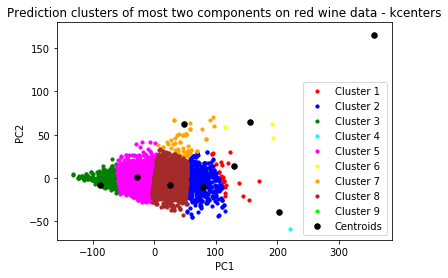

In [98]:
# Visualising the wlusters
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 0, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 0, "PC2"], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 1, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 1, "PC2"], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 2, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 2, "PC2"], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 3, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 3, "PC2"], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 4, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 4, "PC2"], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 5, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 5, "PC2"], s = 10, c = 'yellow', label = 'Cluster 6')
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 6, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 6, "PC2"], s = 10, c = 'orange', label = 'Cluster 7')
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 7, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 7, "PC2"], s = 10, c = 'brown', label = 'Cluster 8')
plt.scatter(X_new_w.loc[ww_y_pred_kcenters == 8, "PC1"], X_new_w.loc[ww_y_pred_kcenters == 8, "PC2"], s = 10, c = 'lime', label = 'Cluster 9')
plt.scatter(w.loc[:, "PC1"], w.loc[:, "PC2"], s = 30, c = 'black', label = 'Centroids')
plt.title('Prediction clusters of most two components on red wine data - kcenters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Actually k-center good for almost all clusters, but as visualisially

### Farthest-first algorithm
-------------------------
- pick any zЄX and set w={z}
- while |w|<k:
	* z = argmax d(X, wi) - xЄX, wi€we
	* w = w u {z}
    
- then, w attempt each sample to closest clusters

#### Red-wine data

Experiments implemented on two most important features data

Cluster number also selected max quality value

Euclidian distance used

In [99]:
rw_most_two_component_data = df_pca_rw_data_ori[['PC1', 'PC2']]

k_r = c_cluster_r
X_r = rw_most_two_component_data.copy()
w = pd.DataFrame()
remove_n = 1

np.random.seed(0)
drop_index = np.random.choice(X_r.index, remove_n, replace=False)[0]
w.loc[drop_index, "PC1"] = X_r.loc[drop_index, "PC1"]
w.loc[drop_index, "PC2"] = X_r.loc[drop_index, "PC2"]
X_r.drop([drop_index], inplace=True)

iter_num = 0
while w.shape[0] <= k_r:  
    max_dist = 0
    max_indx = -1
    for i, rowi in X_r.iterrows():
        dist = 0
        for j, rowj in w.iterrows():
            dist += np.linalg.norm(X_r.loc[i].values - w.loc[j].values)
            
        if dist > max_dist:
            max_dist = dist
            max_indx = i
            
    w.loc[max_indx, "PC1"] = X_r.loc[max_indx, "PC1"]
    w.loc[max_indx, "PC2"] = X_r.loc[max_indx, "PC2"]
    X_r.drop([max_indx], inplace=True)
    iter_num += 1
    
print("iter_num:", iter_num)

iter_num: 8


In 8 iteration clusters found

In [100]:
w

,PC1,PC2
1109,21.470626,6.514522
1081,241.406732,-31.904517
979,-42.334773,-3.804261
1079,230.674270,-29.496431
915,-42.315410,-3.686442
1244,123.163740,30.060277
984,-42.334773,-3.804261
354,121.032963,-1.870806
813,-41.108197,-2.897030


Our centers samples are selected as above with 1109.th, 1081.th, .. 979.th samples

After find ours centers as clusters, find closest cluster for each sample in data via using euclidian distance and visualize them

In [101]:
X_new_r = X_r.copy()
for i, row_r in X_new_r.iterrows():
    distances = w.apply(lambda row: np.linalg.norm(row.values - row_r.values), axis=1)
    min_distance_index = distances[distances == distances.min()].index[0]
    X_new_r.loc[i, "cluster"] = min_distance_index    
    
X_new_r["cluster"] = X_new_r["cluster"].astype(int)

le = LabelEncoder()
X_new_r["cluster"] = le.fit_transform(X_new_r.cluster.values)
rw_y_pred_ff = X_new_r["cluster"]

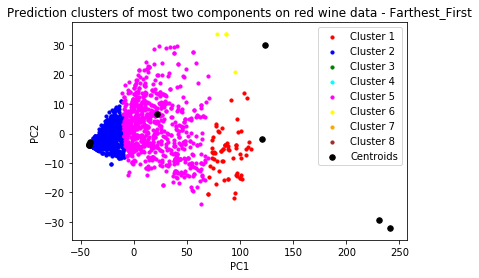

In [102]:
# Visualising the clusters
plt.scatter(X_new_r.loc[rw_y_pred_ff == 0, "PC1"], X_new_r.loc[rw_y_pred_ff == 0, "PC2"], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_new_r.loc[rw_y_pred_ff == 1, "PC1"], X_new_r.loc[rw_y_pred_ff == 1, "PC2"], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_new_r.loc[rw_y_pred_ff == 2, "PC1"], X_new_r.loc[rw_y_pred_ff == 2, "PC2"], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_new_r.loc[rw_y_pred_ff == 3, "PC1"], X_new_r.loc[rw_y_pred_ff == 3, "PC2"], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_new_r.loc[rw_y_pred_ff == 4, "PC1"], X_new_r.loc[rw_y_pred_ff == 4, "PC2"], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_new_r.loc[rw_y_pred_ff == 5, "PC1"], X_new_r.loc[rw_y_pred_ff == 5, "PC2"], s = 10, c = 'yellow', label = 'Cluster 6')
plt.scatter(X_new_r.loc[rw_y_pred_ff == 6, "PC1"], X_new_r.loc[rw_y_pred_ff == 6, "PC2"], s = 10, c = 'orange', label = 'Cluster 7')
plt.scatter(X_new_r.loc[rw_y_pred_ff == 7, "PC1"], X_new_r.loc[rw_y_pred_ff == 7, "PC2"], s = 10, c = 'brown', label = 'Cluster 8')
plt.scatter(w.loc[:, "PC1"], w.loc[:, "PC2"], s = 30, c = 'black', label = 'Centroids')
plt.title('Prediction clusters of most two components on red wine data - Farthest_First')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Actually results not good for some clusters but for one is not bad(Cluster 5)

#### White-wine data

Experiments implemented on two most important features data

Cluster number also selected max quality value

Euclidian distance used

In [103]:
ww_most_two_component_data = df_pca_ww_data_ori[['PC1', 'PC2']]

k_w = c_cluster_w
X_w = ww_most_two_component_data.copy()
w = pd.DataFrame()
remove_n = 1

np.random.seed(0)
drop_index = np.random.choice(X_w.index, remove_n, replace=False)[0]
w.loc[drop_index, "PC1"] = X_w.loc[drop_index, "PC1"]
w.loc[drop_index, "PC2"] = X_w.loc[drop_index, "PC2"]
X_w.drop([drop_index], inplace=True)

iter_num = 0
while w.shape[0] <= k_r:  
    max_dist = 0
    max_indx = -1
    for i, rowi in X_w.iterrows():
        dist = 0
        for j, rowj in w.iterrows():
            dist += np.linalg.norm(X_w.loc[i].values - w.loc[j].values)
            
        if dist > max_dist:
            max_dist = dist
            max_indx = i
            
    w.loc[max_indx, "PC1"] = X_w.loc[max_indx, "PC1"]
    w.loc[max_indx, "PC2"] = X_w.loc[max_indx, "PC2"]
    X_w.drop([max_indx], inplace=True)  
    iter_num += 1
    
print("iter_num:", iter_num)

iter_num: 8


In 8 iteration clusters found

In [104]:
w

,PC1,PC2
2762,16.359582,-32.894881
4745,357.007255,165.435709
3710,-132.919391,4.708558
1417,220.374280,-59.631938
3901,-132.211260,3.481095
1931,191.931279,62.761039
3094,-124.530983,0.404444
2127,201.979678,-39.470989
3095,-124.530983,0.404444


Our centers samples are selected as above with 2762.th, 4745.th, .. 3095.th samples

After find ours centers as clusters, find closest cluster for each sample in data via using euclidian distance and visualize them

In [105]:
X_new_w = X_w.copy()
for i, row_w in X_new_w.iterrows():
    distances = w.apply(lambda row: np.linalg.norm(row.values - row_w.values), axis=1)
    min_distance_index = distances[distances == distances.min()].index[0]
    X_new_w.loc[i, "cluster"] = min_distance_index    
    
X_new_w["cluster"] = X_new_w["cluster"].astype(int)

le = LabelEncoder()
X_new_w["cluster"] = le.fit_transform(X_new_w.cluster.values)
ww_y_pred_ff = X_new_w["cluster"]

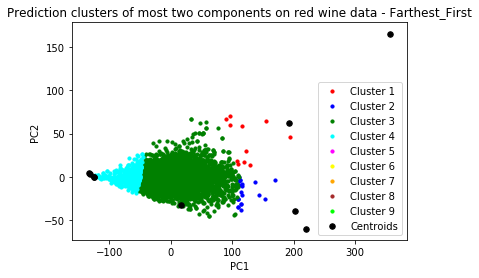

In [106]:
# Visualising the clusters
plt.scatter(X_new_w.loc[ww_y_pred_ff == 0, "PC1"], X_new_w.loc[ww_y_pred_ff == 0, "PC2"], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_new_w.loc[ww_y_pred_ff == 1, "PC1"], X_new_w.loc[ww_y_pred_ff == 1, "PC2"], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_new_w.loc[ww_y_pred_ff == 2, "PC1"], X_new_w.loc[ww_y_pred_ff == 2, "PC2"], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_new_w.loc[ww_y_pred_ff == 3, "PC1"], X_new_w.loc[ww_y_pred_ff == 3, "PC2"], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_new_w.loc[ww_y_pred_ff == 4, "PC1"], X_new_w.loc[ww_y_pred_ff == 4, "PC2"], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_new_w.loc[ww_y_pred_ff == 5, "PC1"], X_new_w.loc[ww_y_pred_ff == 5, "PC2"], s = 10, c = 'yellow', label = 'Cluster 6')
plt.scatter(X_new_w.loc[ww_y_pred_ff == 6, "PC1"], X_new_w.loc[ww_y_pred_ff == 6, "PC2"], s = 10, c = 'orange', label = 'Cluster 7')
plt.scatter(X_new_w.loc[ww_y_pred_ff == 7, "PC1"], X_new_w.loc[ww_y_pred_ff == 7, "PC2"], s = 10, c = 'brown', label = 'Cluster 8')
plt.scatter(X_new_w.loc[ww_y_pred_ff == 8, "PC1"], X_new_w.loc[ww_y_pred_ff == 8, "PC2"], s = 10, c = 'lime', label = 'Cluster 9')
plt.scatter(w.loc[:, "PC1"], w.loc[:, "PC2"], s = 30, c = 'black', label = 'Centroids')
plt.title('Prediction clusters of most two components on red wine data - Farthest_First')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Cluster center are not finded near middle clusters centers, so results are not good

### d. SOM

Som algorithm implemented MiniSom package 

#### Red-wine data

learning rate taken as 0.5 and space size 30x30, number iteration is 10000

In [107]:
num_r = red_wine['quality'].values
data_r = red_wine.drop("quality",axis=1).values

som = MiniSom(30, 30, 11, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data_r)
som.train(data_r, 10000, random_order=True, verbose=True)  # random training

 [   676 / 10000 ]   7% - 0:00:02 left 

 [  1465 / 10000 ]  15% - 0:00:02 left 

 [  2256 / 10000 ]  23% - 0:00:01 left 

 [  3074 / 10000 ]  31% - 0:00:01 left 

 [  3841 / 10000 ]  38% - 0:00:01 left 

 [  4657 / 10000 ]  47% - 0:00:01 left 

 [  5379 / 10000 ]  54% - 0:00:01 left 

 [  6136 / 10000 ]  61% - 0:00:00 left 

 [  6922 / 10000 ]  69% - 0:00:00 left 

 [  7588 / 10000 ]  76% - 0:00:00 left 

 [  8376 / 10000 ]  84% - 0:00:00 left 

 [  9194 / 10000 ]  92% - 0:00:00 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 


 quantization error: 1.5286956092900443


Last error rate is : 1.5

Lets visualize our results how to assign each sample data in new two dimension space and analysis it

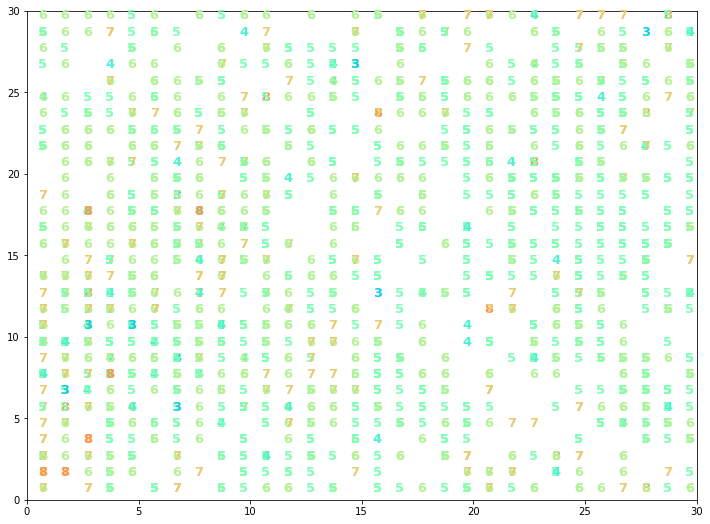

In [108]:
plt.figure(figsize=(12, 9))
wmap = {}
im = 0
for x, t in zip(data_r, num_r):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 13})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

As we see, 3, 4, 5 clusters distributed but for cluster 6 we have some good results via collected in same space

#### White-wine data


learning rate taken as 0.5 and space size 30x30, number iteration is 10000

In [109]:
num_w = white_wine['quality'].values
data_w = white_wine.drop("quality",axis=1).values

som = MiniSom(30, 30, 11, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data_w)
som.train(data_w, 10000, random_order=True, verbose=True)  # random training

 [   659 / 10000 ]   7% - 0:00:02 left 

 [  1424 / 10000 ]  14% - 0:00:02 left 

 [  2229 / 10000 ]  22% - 0:00:01 left 

 [  2972 / 10000 ]  30% - 0:00:01 left 

 [  3773 / 10000 ]  38% - 0:00:01 left 

 [  4535 / 10000 ]  45% - 0:00:01 left 

 [  5301 / 10000 ]  53% - 0:00:01 left 

 [  6111 / 10000 ]  61% - 0:00:00 left 

 [  6905 / 10000 ]  69% - 0:00:00 left 

 [  7711 / 10000 ]  77% - 0:00:00 left 

 [  8504 / 10000 ]  85% - 0:00:00 left 

 [  9301 / 10000 ]  93% - 0:00:00 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 


 quantization error: 3.088673427386396


Last error rate is : 3.08

Lets visualize our results how to assign each sample data in new two dimension space and analysis it

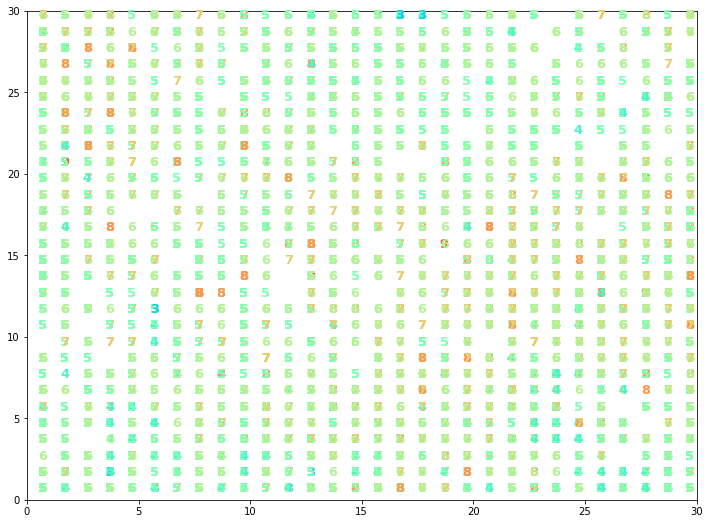

In [110]:
plt.figure(figsize=(12, 9))
wmap = {}
im = 0
for x, t in zip(data_w, num_w):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 13})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

As we see, 3, 7, 8 clusters distributed but for cluster 5 and 6 we have some good results via collected in same space

## REFERENCES

https://realpython.com/k-means-clustering-python/

https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42

https://github.com/JustGlowing/minisom/blob/master/examples/HandwrittenDigits.ipynb

https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn